# **SES ÖZNİTELİKLERİ VE ÖZNİTELİK ÇIKARMA**

#**1- Jupyter notebook sayfamız ile Google Drive arasındaki bağlantının yapılması için aşağıdaki kodu kullanıyoruz.**



In [ ]:
#Notebook ile Drive arasındaki bağlantıyı sağlayalım
#Erişimi uzun olan drive dizini için kısa bir yol tanıma yapıyoruz
# "/content/gdrive/My\ Drive/" olan dizine /mydrive diyerek ulaşabiliriz.
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive


/
Mounted at /content/gdrive


In [ ]:
%cd /mydrive/MAKINE_OGRENMESI2021/KALP

/content/gdrive/My Drive/MAKINE_OGRENMESI2021/KALP


In [ ]:
!ls

 cat_1.wav			   set_a.csv
 Kalp_Sesi_Siniflandirma.ipynb	   set_a_timing.csv
'Kasabian - The Green Fairy.mp3'   set_b
 Ses_Oznitelik_Cikarimi.ipynb	   set_b.csv
 set_a


#**2. Ses Dosyamızın Bilgileri**

In [ ]:
import soundfile
import librosa
import librosa.display


In [ ]:
#path="cat_1.wav"
#soundfile.info(path)
#signal, sampling_rate = librosa.load(path, sr=None)

#**3.	Bir ses dosyası yükleme, oynatma, kaydetme, görüntüleme**

Librosa müzik ve ses analizi için kullanılan bir Python paketidir.

**signal → ses zaman serisi**

**sampling_rate →ses frekansı(Hz)** 


In [ ]:
signal, sampling_rate = librosa.load(librosa.util.example_audio_file(),duration=60)
#signal, sampling_rate = librosa.load(librosa.util.example_audio_file(), mono=False,duration=60)


print("signal type:",type(signal),"sr type",type(sampling_rate))
print(signal.shape,sampling_rate)

signal type: <class 'numpy.ndarray'> sr type <class 'int'>
(1323000,) 22050


**Sesi oynatmak için IPython kütüphanesinden yararlanıyoruz.**

In [ ]:
from IPython import display
display.Audio(signal, rate=sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

**Librosa sesi okumamızı sağladığı gibi sesi kaydetmemize de olanak sağlıyor**

In [ ]:
signal, sampling_rate = librosa.load(librosa.util.example_audio_file())
librosa.write_wav('ses_kayit.wav', signal, sampling_rate)

**Sesi Görüntüleme**

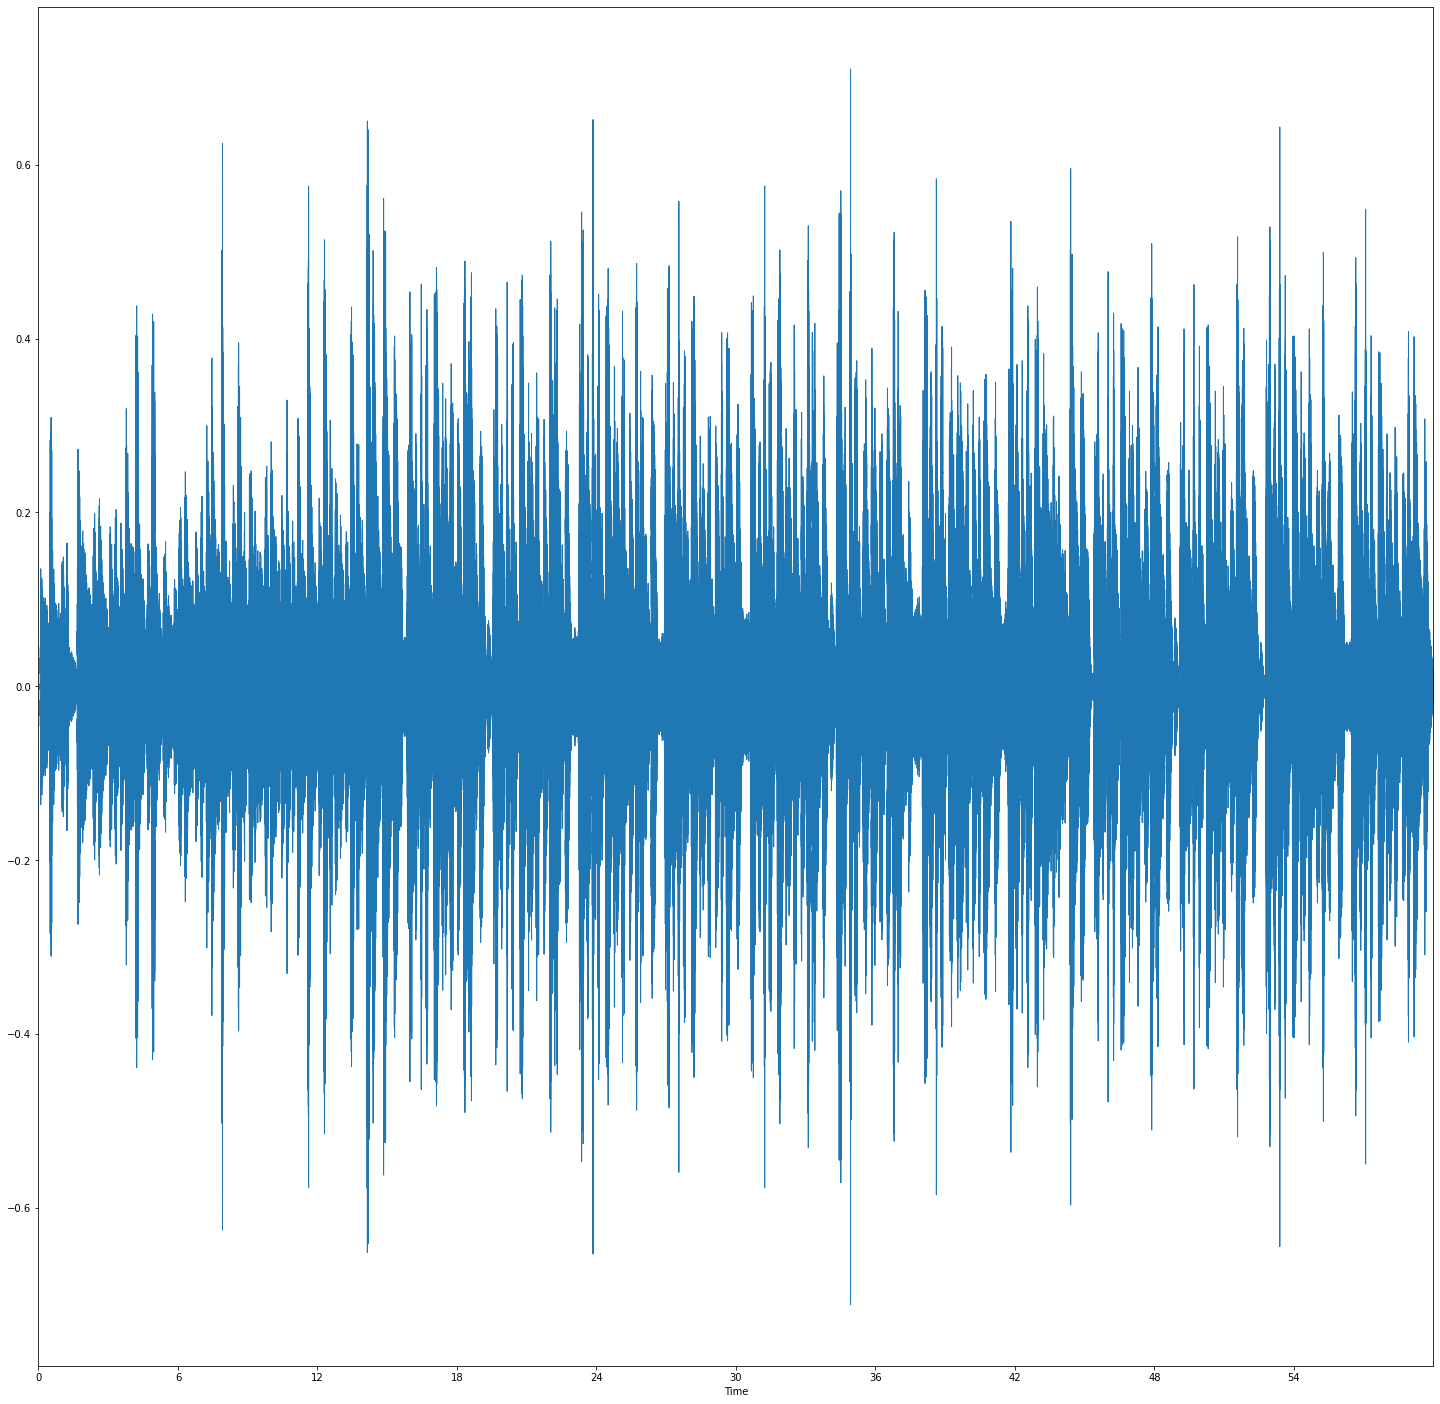

In [8]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(25,25))
librosa.display.waveplot(signal,sr=sampling_rate)


#**4. Spektrogram**



**Spektrogram, belirli bir dalga formunda bulunan çeşitli frekanslarda bir sinyalin sinyal gücünü veya yüksekliğini temsil eden görseldir. Aynı zamanda enerji seviyelerini zaman içinde nasıl değiştiğini de gösterir. Bir spektrogram, tek bir grafikte zaman, frekans ve genliği temsil eden ayrıntılı bir ses görünümüdür. Bir spektrogram, sesteki geniş bantlı, elektriksel veya kesintili gürültüyü görsel olarak ortaya çıkarabilir ve bu ses sorunlarını yalnızca grafikten alıntı yaparak ayırmanıza olanak tanır.**

**Time Fourier Transform: Ses sinyali işlemek için güçlü bir araçtır. Sinyaller için zamana ve frekansa göre karmaşık genliği belirten zaman frekansı dağılımını tanımlar**
 
https://musiclab.chromeexperiments.com/Spectrogram/


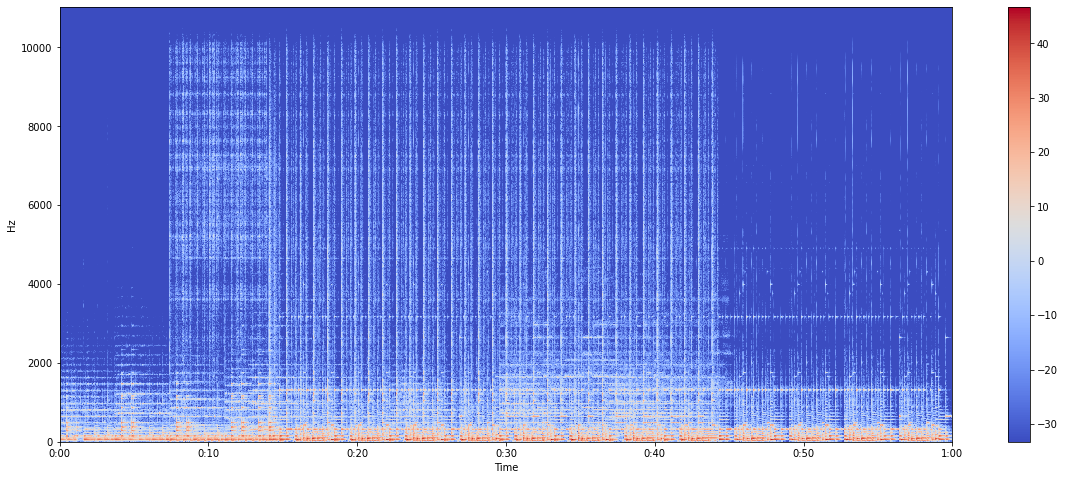

In [9]:
X=librosa.stft(signal) #stft -> Short-time Fourier transform
Xdb=librosa.amplitude_to_db(abs(X)) #Genlikten Desibel değerine
plt.figure(figsize=(20,8))
librosa.display.specshow(Xdb,sr=sampling_rate,x_axis="time",y_axis="hz")
plt.colorbar()

#**5. Feature Extraction — Öznitelik Çıkarımı**

1.   Mel-Frekans Kepstral Katsayıları
2.   Zero Crossing Rate
3.   Spectral Centroid
4.   Spectral Rolloff 
5.   Chroma Frekansı
6.   Spektral Bant Genişliği





**1.   Mel-Frekans Kepstral Katsayıları**

Mel-Frekans Kepstral Katsayıları (Mel-Frequency Cepstral Coefficients)

Mel frekans ölçeği, insan kulağının ses frekanslarındaki değişimi algılayışını gösteren bir ölçektir. MFCC(Mel-Frequency Cepstral Coefficients), ses sinyalinin kısa zamanlı güç spektrumunun Mel ölçeği üzerindeki ifadesidir. Mel ölçeği 1 kHz’e kadar doğrusal, 1 kHz’den sonra ise logaritmik olarak değişen aralıklarla ifade edilen bir ölçektir. 

Frekanstan Mel ölçeğine dönüşüm formülü;

M ═ 1125 × ln(1+(f÷700))

M → Mel ölçeği

f → Frekans(Hz)

In [10]:
mfkk=librosa.feature.mfcc(signal,sr=sampling_rate)
print(mfkk.shape)
 

(20, 2584)


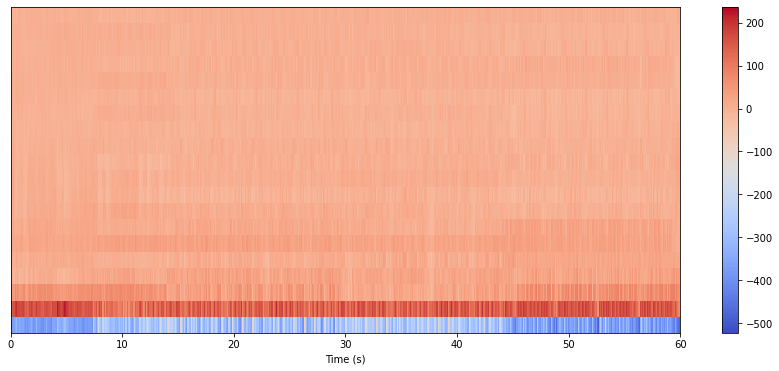

In [11]:
plt.figure(figsize=(15,6))
librosa.display.specshow(mfkk,x_axis="s")
plt.colorbar()

**2.   Zero Crossing Rate**

Zero crossing rate bir sinyalin sıfır çizgisinden geçişi yani işaret değişiminin oranıdır.
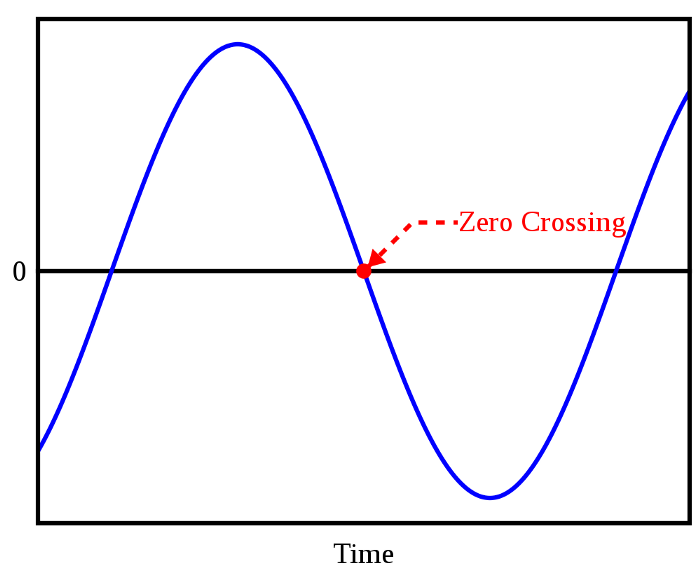

In [12]:
zero_crossing=librosa.zero_crossings(signal)
print(sum(zero_crossing)) #Toplam sıfır geçişi sayısı

29367


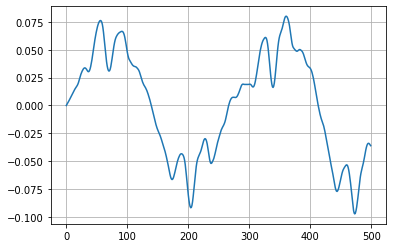

In [13]:
plt.plot(signal[5000:5500])
plt.grid()

**3.   Spectral Centroid**

Spektrumun kütle merkezinin nerede olduğunu gösterir.

In [14]:
spec_cent=librosa.feature.spectral_centroid(signal,sr=sampling_rate)
print(spec_cent.shape)

#plt.semilogy(spec_cent.T)
#plt.ylabel("Hz")


(1, 2584)


**4.   Spectral Rolloff**

Sinyal şeklinin ölçüsü. Toplam spektral enerjisinin belli bir yüzdesini temsil eder.

(1, 2584)


Text(0, 0.5, 'Hz')

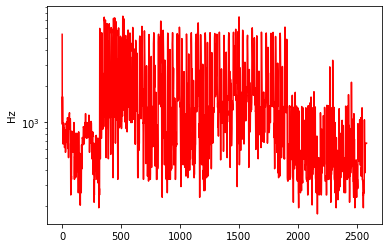

In [15]:
spec_roll=librosa.feature.spectral_rolloff(signal,sr=sampling_rate)
print(spec_roll.shape)
 
plt.semilogy(spec_roll.T,"r")
plt.ylabel("Hz")

**5.   Chroma Frekansı**

Spektrum müzikal oktavının 12 farklı yarı tonunu(chroma) temsil eden 12 parçanın belirtildiği ses için güçlü bir sunumudur.

(12, 2584)


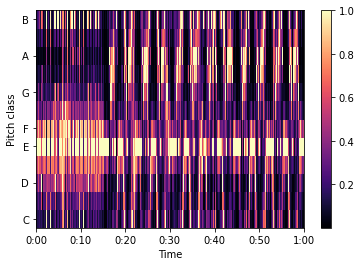

In [16]:
chroma=librosa.feature.chroma_stft(signal,sr=sampling_rate)
print(chroma.shape)

librosa.display.specshow(chroma,y_axis="chroma",x_axis="time")
plt.colorbar()

**6.Spektral Bant Genişliği**

Ses sinyalinin dalga genişliğinin maksimum tepe noktasının yarısını tanımlar.


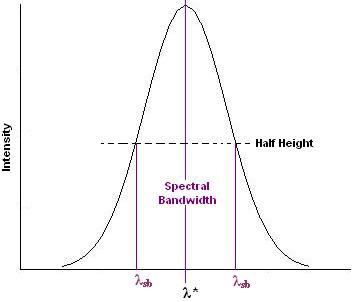


In [17]:
spec_band=librosa.feature.spectral_bandwidth(signal,sr=sampling_rate)
print(spec_band,spec_band.shape)

[[2669.36685256 1335.37851891 1511.4928032  ...  444.4012816
   462.79794389  607.91079921]] (1, 2584)
